In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# load call detail record dataset and coerce to respective datatypes
df = pd.read_csv("/Users/valerie/Downloads/DAT210x-master/Module5/Datasets/CDR.csv")

df.CallDate = pd.to_datetime(df.CallDate, errors="coerce")
df.CallTime = pd.to_timedelta(df.CallTime, errors="coerce")
df.Duration = pd.to_timedelta(df.Duration, errors="coerce")
df.dtypes
print(df)

               In         Out Direction   CallDate        CallTime  DOW  \
0      4638472273  2666307251  Incoming 2010-12-25 07:16:24.736813  Sat   
1      4638472273  1755442610  Incoming 2010-12-25 21:18:30.053710  Sat   
2      4638472273  5481755331  Incoming 2010-12-25 14:52:42.878016  Sat   
3      4638472273  1755442610  Incoming 2010-12-25 16:02:09.001913  Sat   
4      4638472273  2145623768  Incoming 2010-12-25 15:28:35.028554  Sat   
5      4638472273  2946222380  Incoming 2010-12-25 11:38:17.275327  Sat   
6      4638472273  7841019020    Missed 2010-12-25 10:38:35.924232  Sat   
7      1559410755  6092528894    Missed 2010-12-25 15:15:56.502972  Sat   
8      1559410755  6092528894  Incoming 2010-12-25 20:15:19.667734  Sat   
9      1559410755  8125446700    Missed 2010-12-25 10:01:02.162977  Sat   
10     1559410755  5452154622  Incoming 2010-12-25 19:57:00.050868  Sat   
11     1559410755  1747156055  Incoming 2010-12-25 10:08:39.978468  Sat   
12     1559410755  848404

In [3]:
# create a list of unique phone numbers
in_l = []
for i in df.In:
    if i not in in_l:
        in_l.append(i)
in_l

[4638472273,
 1559410755,
 4931532174,
 2419930464,
 1884182865,
 3688089071,
 4555003213,
 2068627935,
 2894365987,
 8549533077]

In [4]:
# user1 is the 1st phone number on in_l
user1 = df[df.In == in_l[0]]

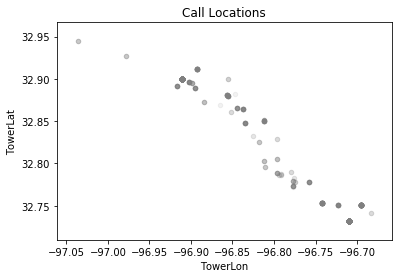

In [5]:
# plot all call locations
user1.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
plt.show()

In [6]:
# examine records on weekends
sat = (user1.DOW == 'Sat')
sun = (user1.DOW == 'Sun')
user1 = user1[sat | sun]
user1

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,00:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,00:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,00:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,00:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,00:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
5,4638472273,2946222380,Incoming,2010-12-25,11:38:17.275327,Sat,00:03:06.670355,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
6,4638472273,7841019020,Missed,2010-12-25,10:38:35.924232,Sat,00:02:02.855268,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
71,4638472273,5912117253,Incoming,2010-12-26,14:34:27.530327,Sun,00:06:34.154104,84844bb1-1d36-4401-abf4-a3c566c07630,32.895833,-96.901944
72,4638472273,2145623768,Incoming,2010-12-26,20:45:00.306964,Sun,00:03:35.283608,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417
73,4638472273,4551601645,Missed,2010-12-26,16:03:43.841914,Sun,00:04:15.182895,bf3bf815-3795-4be6-bec3-12b8f713e50d,32.899944,-96.910389


In [7]:
# Logic used on people on weekends:
# 1. People usually don't go to work
# 2. They usually sleep in late on Saturday
# 3. They should be at home during very late hours, e.g. 1-4 AM

In [8]:
# Filter user1 for calls that came in before 6AM OR after 10pm
bfr_6 = (user1.CallTime < '06:00:00')
aft_10 = (user1.CallTime > '22:00:00')
user1 = user1[bfr_6 | aft_10]
user1.size

280

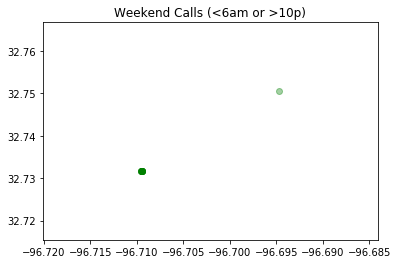

In [9]:
# Visualize dataframe with scatter plot
# The area of concentration is likely the coordinates of the user's residence
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekend Calls (<6am or >10p)')
plt.show()

In [10]:
user1_lon_lat = user1[['TowerLat', 'TowerLon']]

In [11]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.TowerLon, df.TowerLat, marker='.', alpha=0.3)

    
    # Filter df so it only contains Longitude and Latitude
    df = df[['TowerLon', 'TowerLat']]


    # Use K-Means to try and find two cluster centers in this df.
    # Bkmeans model = 'model'
    model = KMeans(n_clusters=2)  # n_clusters, the "K" number of clusters you want K-Means to place for you.
    model.fit(df)
    labels = model.predict(df)


    # Print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[-96.70944573  32.73164942]
 [-96.694722    32.750556  ]]


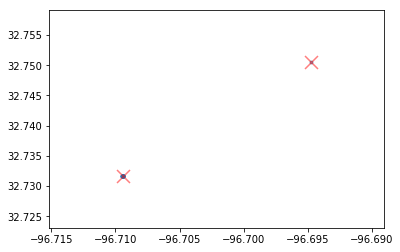

In [12]:
doKMeans(user1_lon_lat)

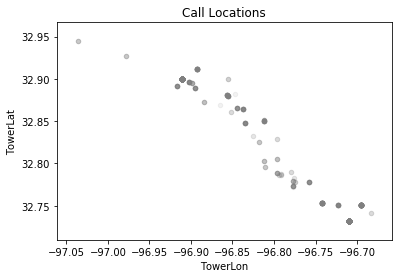

[[-96.70944573  32.73164942]
 [-96.694722    32.750556  ]]


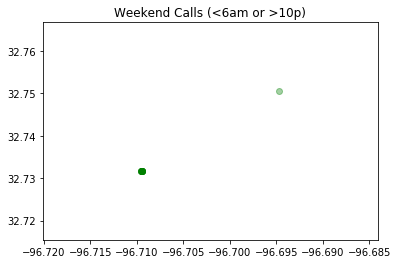

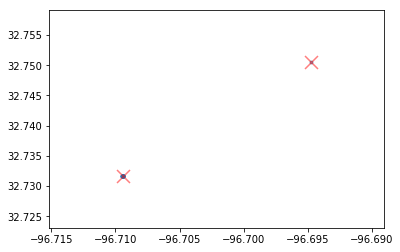

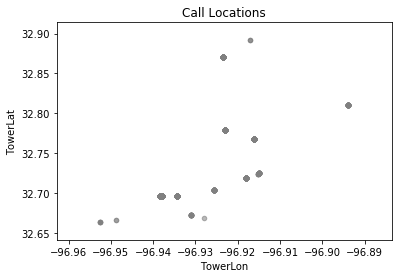

[[-96.92355156  32.87096756]
 [-96.923556    32.871111  ]]


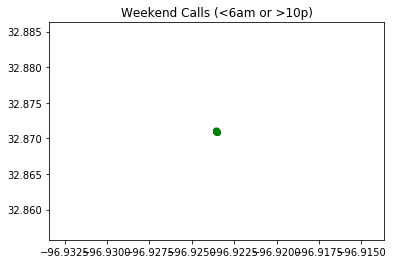

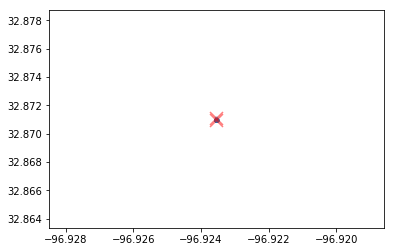

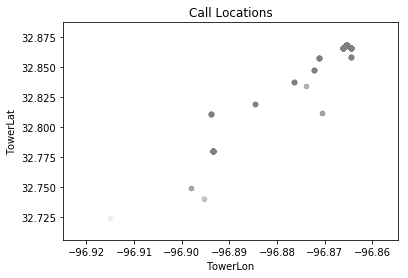

[[-96.865298    32.86592718]
 [-96.864444    32.857778  ]]


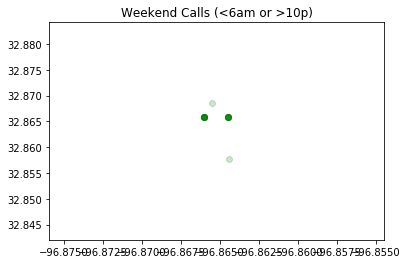

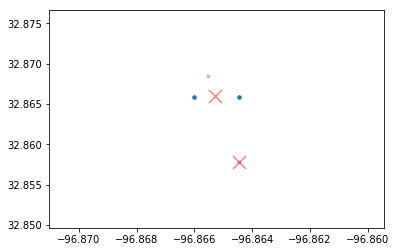

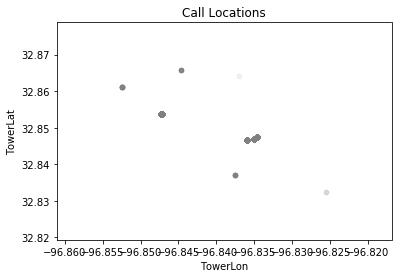

[[-96.852389    32.861222  ]
 [-96.83515822  32.84635163]]


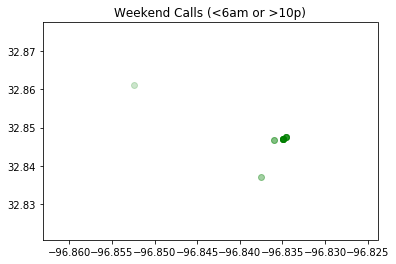

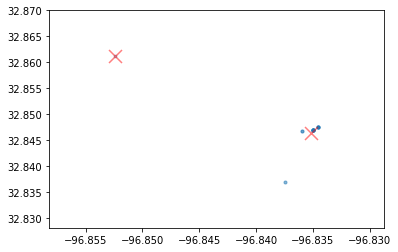

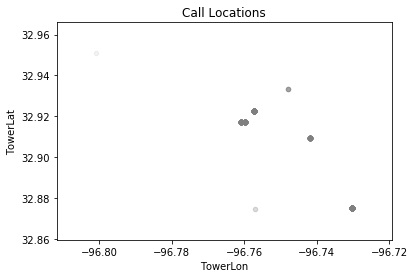

[[-96.730278  32.875   ]
 [-96.759694  32.917333]]


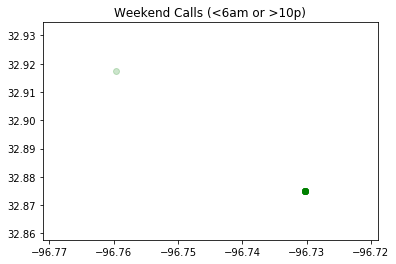

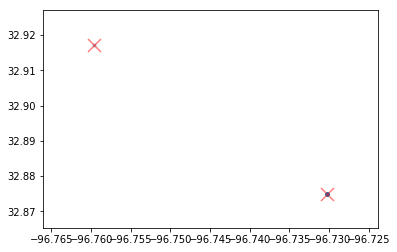

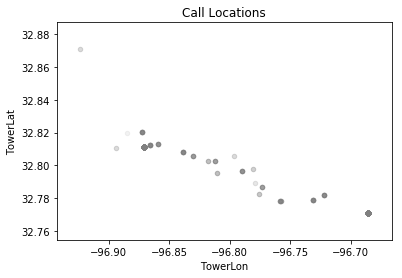

[[-96.685556  32.770833]
 [-96.685556  32.770833]]


/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)


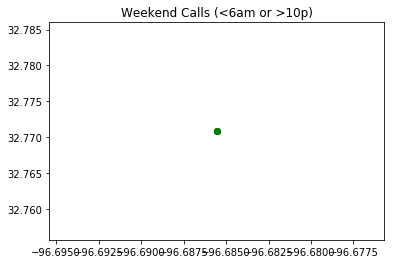

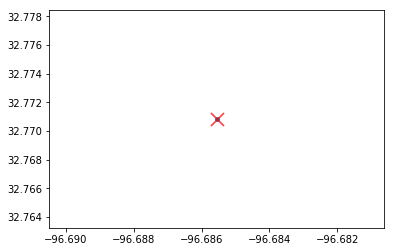

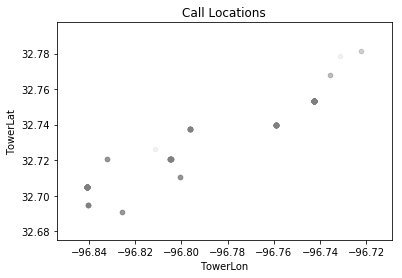

[[-96.840667  32.705222]
 [-96.840556  32.695   ]]


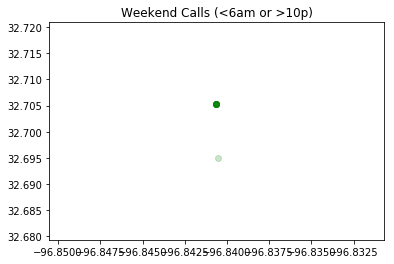

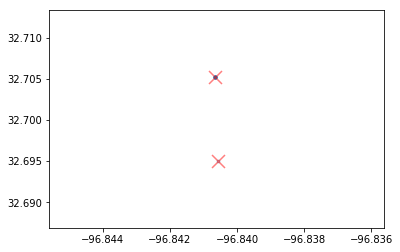

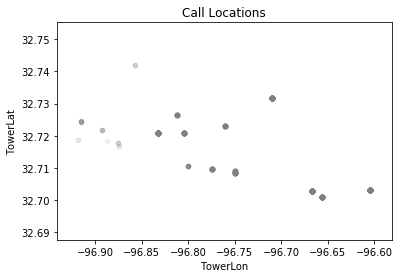

[[-96.604444  32.703056]
 [-96.604444  32.703056]]


/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)


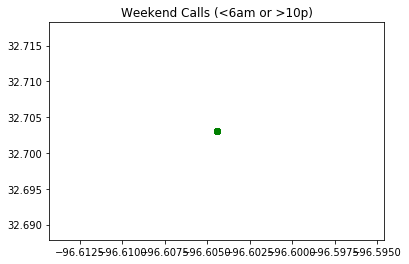

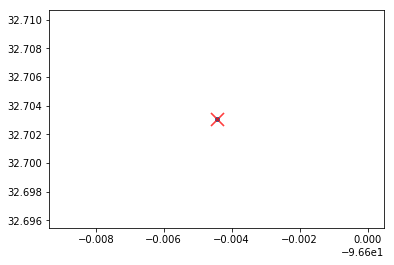

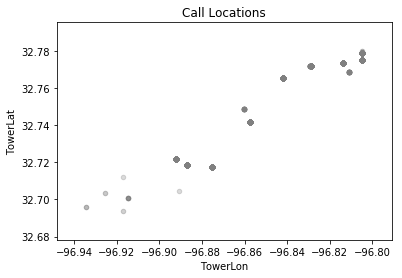

[[-96.920139    32.702     ]
 [-96.81277401  32.77401172]]


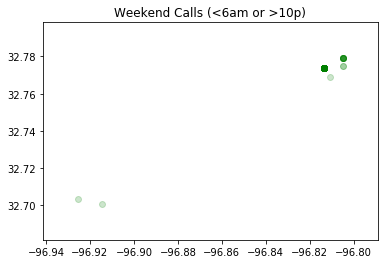

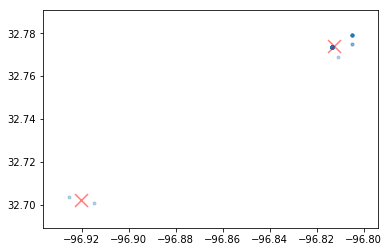

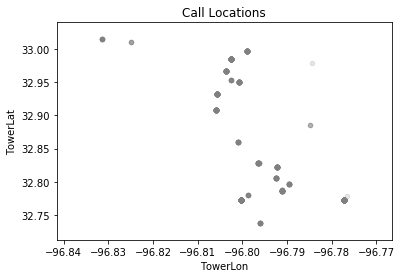

[[-96.77946848  32.7722949 ]
 [-96.831472    33.01525   ]]


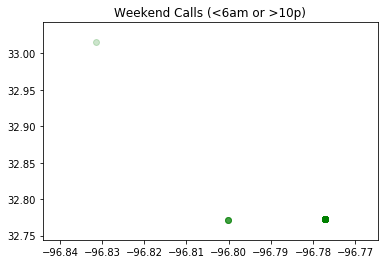

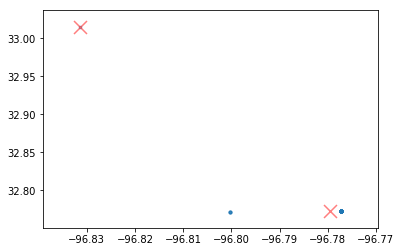

In [13]:
# for loop to go through every phone number in in_l
for el in in_l:
    
    user1 = df[df.In == el]

    user1.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
    plt.show()

    sat = (user1.DOW == 'Sat')
    sun = (user1.DOW == 'Sun')
    user1 = user1[sat | sun]

    bfr_6 = (user1.CallTime < '06:00:00')
    aft_10 = (user1.CallTime > '22:00:00')
    user1 = user1[bfr_6 | aft_10]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
    ax.set_title('Weekend Calls (<6am or >10p)')

    user1_lon_lat = user1[['TowerLat', 'TowerLon']]
    
    doKMeans(user1_lon_lat)